# Programming Assignment 3

<H2>1.</H2> 
<p>The recursive form of the given signal is:
 \begin{equation*}
    (n+1)y[n]-ny[n-1]=x[n]
\end{equation*}<br>
Using the recursive form of the signal, we find the signal y[n] in the following snippet. We use the input signal as a unit step signal and assume causality and LTI properties for the system.
</p>

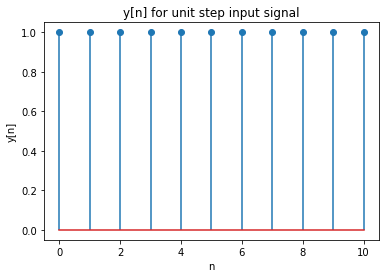

In [13]:
import math
import numpy as np
import collections
import matplotlib.pyplot as plt

#1
x=np.arange(0,11)
def unitstep(x):
    if x>=0:
        return 1
    else:
        return 0

def prev(x,y):
    if x<0:
        return 0
    else:
        return y[n-1]

def delta(x):
    if x==0:
        return 1
    else:
        return 0

#the corresponding recursive equation is (n+1)y[n]-ny[n-1]=x[n]
#assuming x[n] to be unitstep function and the system to be causal and LTI
#which means output is zero when input is zero
y=[]
for n in x:
    if n>=0:
        y.append((unitstep(n)+n*prev(n-1,y))/(n+1))
    else:
        y.append(0)
plt.stem(x,y)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('y[n] for unit step input signal')
plt.show()


<p> we now use the given recursion function:
\begin{equation*}
    y[n]=\frac{1}{4}y[n-1]+x[n]
\end{equation*}
</p>
<p> The input signal is $x[n] = \delta(n-1)$ </p>

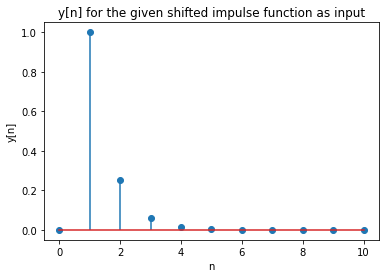

In [14]:
y=[]
for n in x:
    y.append(1/4*prev(n-1,y)+delta(n-1))
plt.stem(x,y)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('y[n] for the given shifted impulse function as input')
plt.show()

<H2>2.</H2> 
<p>The given signal is:
 \begin{equation*}
 x[n] = \sum_{m=-\infty}^{\infty}\{4 \delta[n-4m]+ 8 \delta[n-1-4
m]\}
\end{equation*}
For a given n, we have :
$\delta[n-4m] = 0$
unless n is a multiple of 4. Similarily we have:
$\delta[n-4m-1] = 0$
unless n leaves a remainder 1 when divided by 4. 
</p>
<p>
Hence, n is only non-zero when n is a multiple of 4 or it leaves 1 when divided by 4. Moreover, it is clear that when n is a multiple of 4, value of x[n] = 4 and when n leaves a remainder 1 upon division by 4, x[n] takes the value 8.</p>
<p> We now use this result to construct the input signal below: </p>

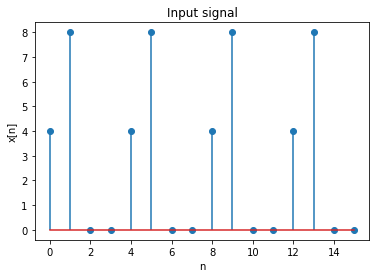

periodic with period = 4


In [15]:
import math
import numpy as np
import collections
import matplotlib.pyplot as plt

x=np.arange(0,16)
def delta(x):
    if x.is_integer():
        return 1
    else:
        return 0
def dataY(n):
    return 4*delta(n/4)+8*delta((n-1)/4)
y=[]

for n in x:
    y.append(dataY(n))

plt.stem(x,y)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('Input signal')
plt.show()
#from the plot it can be seen clearly that x[n] is periodic
#values oscillate as 4,8,0,0 and this pattern goes on repeating
print('periodic with period = '+str(4))
N=4#fundamental period


<p>As seen above, the signal is periodic with a fundamental period equal to 4 ie, <br>
$P_0 = 4$
</p>
<p> <u> Evaluating the fourier series coeffecients for the signal: </u> </p>
<p>We shall plot the coeffecients of the following DTFS representation of the given signal
 \begin{equation*}x[n]=\sum_{k=-\infty}^{\infty}\{a_ke^{jnk2\pi/N}\}\end{equation*}
Here, $a_k$can be evaluated by using the relation:
     \begin{equation*}a_k= 1/N \sum_{n=<N>}^{}\{x[n]e^{-jnk2\pi/N}\}\end{equation*}
The following code uses the above relation to evaluate the coeffecients and plot them with respect to k.
    </p>    
    

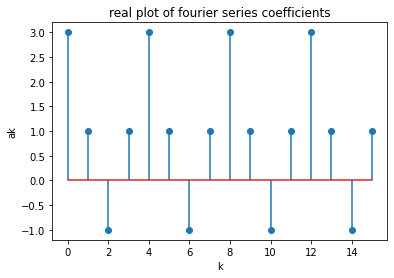

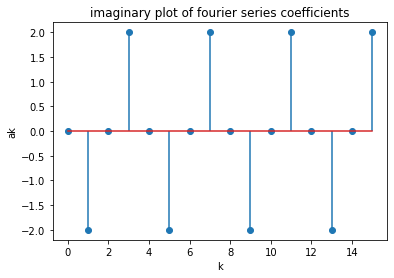

In [52]:
ak=[]
def akGenerator(n,k):
    return (dataY(n)*np.exp(-1j*k*n*np.pi/2))
for k in x:
    s=0
    for n in range(0,N):
        s=s+akGenerator(n,k)
    ak.append(s/4)
akr=[]
akimg=[]
for i in ak:
    akr.append(i.real)
    akimg.append(i.imag)
plt.stem(x,akr)
plt.xlabel('k')
plt.ylabel('ak')
plt.title('real plot of fourier series coefficients')
plt.show()

plt.stem(x,akimg)
plt.xlabel('k')
plt.ylabel('ak')
plt.title('imaginary plot of fourier series coefficients')
plt.show()


<h3> Properties of DTFS </h3>
<p> We shall now verify the following properties of DTFS for the given signal
    <br>
Our strategy to verify it is to get the coefficients of the DTFS in 2 ways -
    <ul><li> By doing an operation on the signal in the time domain - Case 1</li> <li> By doing the corresponding operation on the coefficients - Case 2</li></p>

<h5> Time shift property </h5>
<p> Here, we shall shift the signal by n0 = 2 and perform the the following two operations: </p>


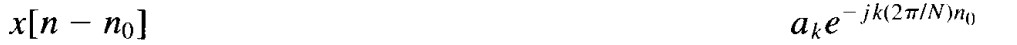

Verifying time shifting property
Real part of coefficients


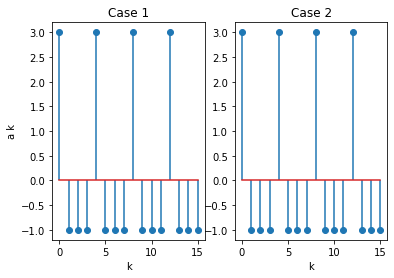

Imaginary part of coefficients


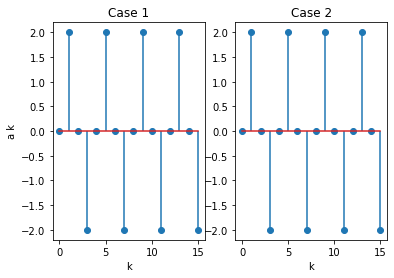

In [53]:
def dataYn(n):
    return 4*delta((n-no)/4)+8*delta((n-no-1)/4)
  
def aknGenerator(n):
    return (yn[n]*np.exp(-1j*k*n*np.pi/2))

no=2
yn=[]
for n in x:
    yn.append(dataYn(n))
akn=[]
for k in x:
    s=0
    for n in range(0,N):
        s=s+(aknGenerator(n))
    akn.append(s/4)
temp=[]
for k in x:
    temp.append(ak[k]*np.exp(-1j*k*np.pi*no/2))

aknR = []
aknI = []
tempR = []
tempI = []
for i in range(len(akn)):
    aknR.append(akn[i].real)
    aknI.append(akn[i].imag)
    tempI.append(temp[i].imag)
    tempR.append(temp[i].real)
print("Verifying time shifting property")
print("Real part of coefficients")    
plt.subplot(1,2,1)
plt.stem(x,aknR)
plt.xlabel('k')
plt.ylabel('a k')
plt.title("Case 1")
plt.subplot(1,2,2)
plt.stem(x,tempR)
plt.xlabel('k')
plt.title("Case 2")
plt.show()
#both plots are same so timeshifting property verified
print("Imaginary part of coefficients")    
plt.subplot(1,2,1)
plt.stem(x,aknI)
plt.xlabel('k')
plt.title("Case 1")

plt.ylabel('a k')
plt.subplot(1,2,2)
plt.stem(x,tempI)
plt.title("Case 2")

plt.xlabel('k')
plt.show()

<p> The corresponding plots obtained in both cases are identical. Hence we find that Time Shifting property is verified. Now we shall use the time shifted signal and the original signal to check for linearity of the same </p>
<h5> Linearity: </h5>
<p> To show Linearity, we take the linear combination of two signals and take the DTFS coefficients of the final signal and compare it with the same linear combination of the coefficients of DTFS of the two initial signals. We plot the resultant signals in either case and make inferences from the established plots. </p>

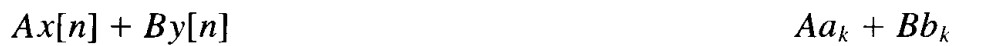

Verifying time linearity property
Real part of coefficients


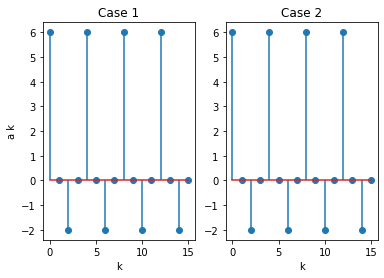

Imaginary part of coefficients


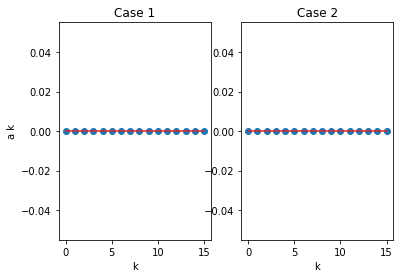

In [54]:

#properties of DTFS
#time shifting

#linearity property
#x[n] and x[n-no] are input signals
a=b=1
bk=[]
for k in x:
    s=0
    for n in range(0,N):
        s=s+((yn[n]+y[n])*np.exp(-1j*k*n*np.pi/2))
    bk.append(s/4)

temp=[ak[i]+akn[i] for i in x]
bkR = []
bkI = []
tempR = []
tempI = []
for i in range(len(akn)):
    bkR.append(bk[i].real)
    if bk[i].imag<1/math.pow(10,13) and bk[i].imag> -1 / math.pow(10,13):
        bkI.append(0)
    else:    
        bkI.append(bk[i].imag)
    if temp[i].imag<1/math.pow(10,13) and temp[i].imag> -1 / math.pow(10,13):
        tempI.append(0)
    else:    
        tempI.append(temp[i].imag)
    tempR.append(temp[i].real)
print("Verifying time linearity property")

print("Real part of coefficients")    
plt.subplot(1,2,1)
plt.stem(x,bkR)
plt.title("Case 1")

plt.xlabel('k')
plt.ylabel('a k')
plt.subplot(1,2,2)
plt.stem(x,tempR)
plt.title("Case 2")

plt.xlabel('k')
plt.show()
#both plots are same so timeshifting property verified
print("Imaginary part of coefficients")    
plt.subplot(1,2,1)
plt.stem(x,bkI)
plt.title("Case 1")

plt.xlabel('k')
plt.ylabel('a k')
plt.subplot(1,2,2)
plt.stem(x,tempI)
plt.title("Case 2")

plt.xlabel('k')
plt.show()

<p> The computed DTFS coefficients are equal in both the cases as infered from the plots. Hence, linearity holds.</p>
<h5> Frequency shift: </h5>
<p>We shall use a strategy similar to the previous cases and compare the plots in the two cases to verify the property.</p>

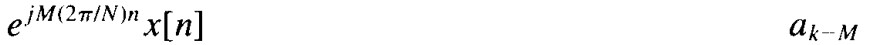

Real part of coefficients


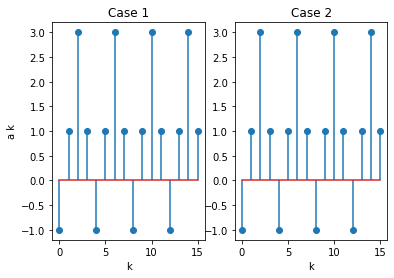

Imaginary part of coefficients


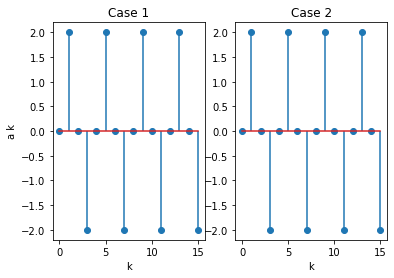

In [58]:
#frequency shift
M=2
yfs=[]
for n in x:
    yfs.append(np.exp(1j*M*np.pi*n/2)*(4*delta(n/4)+8*delta((n-1)/4)))

bk=[]
for k in x:
    s=0
    for n in range(0,N):
        s=s+(yfs[n]*np.exp(-1j*k*n*np.pi/2))
    bk.append(s/4)
a_list=collections.deque(ak)
a_list.rotate(- M)
temp=list(a_list)

def plotter(x,bk,temp):
    """Utility Function to plot"""
    bkR = []
    bkI = []
    tempR = []
    tempI = []
    for i in range(len(akn)):
        bkR.append(bk[i].real)
        if bk[i].imag<1/math.pow(10,13) and bk[i].imag> -1 / math.pow(10,13):
            bkI.append(0)
        else:    
            bkI.append(bk[i].imag)
        if temp[i].imag<1/math.pow(10,13) and temp[i].imag> -1 / math.pow(10,13):
            tempI.append(0)
        else:    
            tempI.append(temp[i].imag)
        tempR.append(temp[i].real)
    print("Real part of coefficients")    
    plt.subplot(1,2,1)
    plt.stem(x,bkR)
    plt.title("Case 1")
    plt.xlabel('k')
    plt.ylabel('a k')
    plt.subplot(1,2,2)
    plt.stem(x,tempR)
    plt.title("Case 2")
    plt.xlabel('k')
    plt.show()
    print("Imaginary part of coefficients")    
    plt.subplot(1,2,1)
    plt.stem(x,bkI)
    plt.title("Case 1")

    plt.xlabel('k')
    plt.ylabel('a k')
    plt.subplot(1,2,2)
    plt.stem(x,tempI)
    plt.title("Case 2")

    plt.xlabel('k')
    plt.show()
    
plotter(x,bk,temp)    

<p> The real and imaginary plots of the two cases are identical and hence the property has been verified</p>

<h5>Multiplication Property</h5>
<p>Multiplication Property states that multiplication in time domain leads to periodic convolution in the frequency domain.</p> 

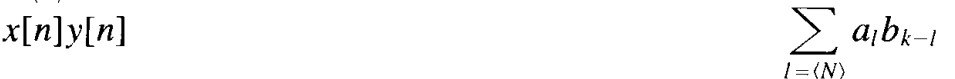

Real part of coefficients


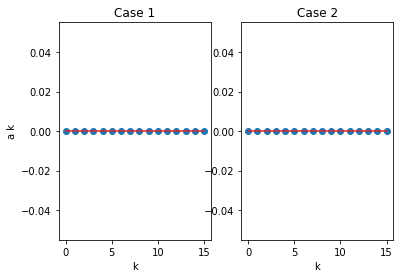

Imaginary part of coefficients


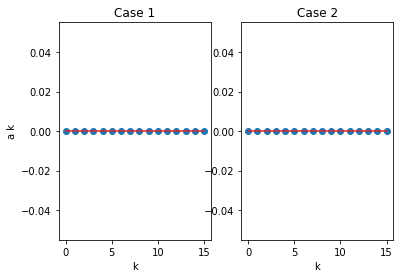

In [59]:
#x[n] and x[n-no] be two signals
def dataYmp(n):
    return dataY(n)*dataYn(n)

ymp=[dataYmp(i) for i in x]
bk=[]
for k in x:
    s=0
    for n in range(0,N):
        s=s+(dataYmp(n)*np.exp(-1j*k*n*np.pi/2))
    bk.append(s/4)    
temp=[]
def dataErrorHandler(data):
    """utility function to handle internal error of python library"""
    if data <0 and data > -1/math.pow(10,-13):
        return 0
    if data >0 and data < 1/math.pow(10,13):
        return 0
    return data
for k in x:
    s=0
    for l in range(N):
        s=s+ak[l]*akn[k-l]        
    temp.append(dataErrorHandler(s))
plotter(x,bk,temp)

<p> The real and imaginary plots of the two cases are identical and hence the property has been verified</p>


<h5>Convolution Property</h5>
<p> Analogous to the previous case, periodic convolution in the time domain leads to multiplication in the frequency domain </p>

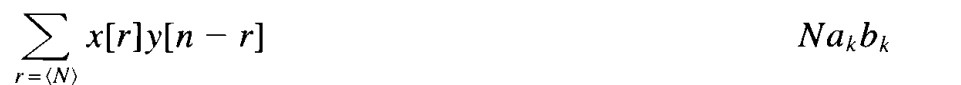

Real part of coefficients


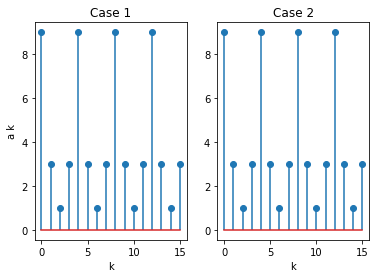

Imaginary part of coefficients


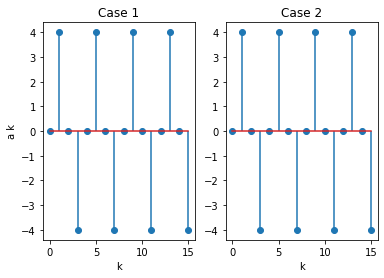

In [60]:
data = []
for i in range(len(x)):
   s = 0
   for l in range(N):
     s+=dataY(l)*dataYn(i-l)
   data.append(s/4)
ymp=data
bk=[]
for k in x:
    s=0
    for n in range(0,N):
        s=s+(data[n]*np.exp(-1j*k*n*np.pi/2))
    bk.append(s/4)
temp=[ak[i]*akn[i] for i in x]
def dataErrorHandler(data):
    if data <0 and data > -1/math.pow(10,-13):
        return 0
    if data >0 and data < 1/math.pow(10,13):
        return 0
    return data
plotter(x,bk,temp)

<p> The real and imaginary plots of the two cases are identical and hence the property has been verified</p>

<h5>Difference Property</h5>


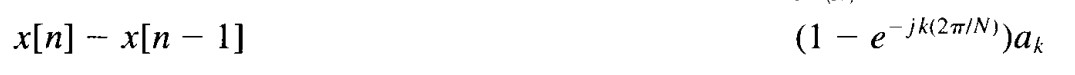

Real part of coefficients


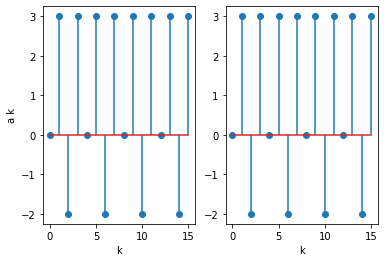

Imaginary part of coefficients


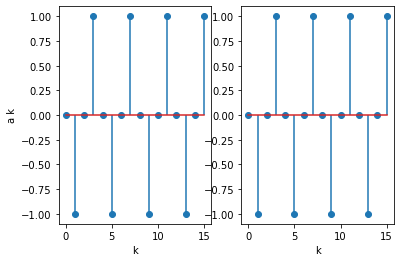

In [103]:
#difference property
no=1
yn=[]
for n in range(-1,11):
    yn.append(4*delta((n-no)/4)+8*delta((n-no-1)/4))
ydiff=[y[i]-y[i-1] for i in x]
bk=[]
for k in x:
    s=0
    for n in range(0,N):
        s=s+(ydiff[n]*np.exp(-1j*k*n*np.pi/2))
    bk.append(s/4)
temp=[]
for k in x:
    temp.append(ak[k]*(1-np.exp(-1j*k*np.pi*no/2)))
plotter(x,bk,temp)


<p> The real and imaginary plots of the two cases are identical and hence the property has been verified</p>
<h5> Symmetry Property </h5>

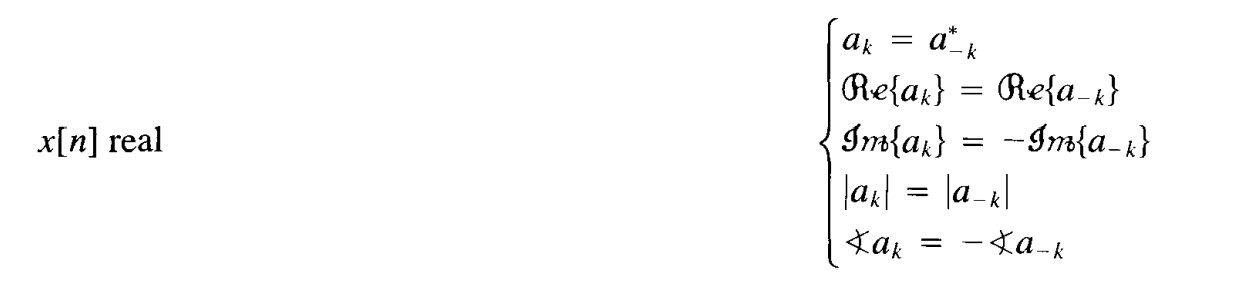

real part of coefficients


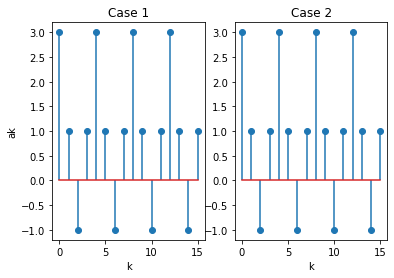

imaginary part of coefficients


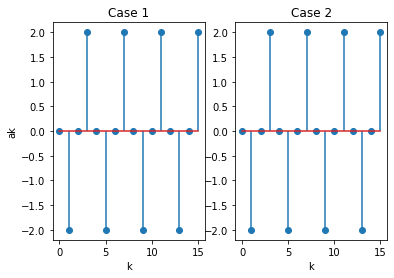

In [66]:
a_k=[]
for k in x:
    s=0
    for n in range(0,N):
        s=s+(y[n]*np.exp(-1j*-1*k*n*np.pi/2))
    a_k.append(s/4)
a__k=[np.conj(i) for i in a_k]
a__kr=[]
a__kimg=[]
for i in ak:
    a__kr.append(i.real)
    a__kimg.append(i.imag)

print("real part of coefficients")
plt.subplot(1,2,1)
plt.stem(x,akr)
plt.title('Case 1')
plt.xlabel('k')
plt.ylabel('ak')
plt.subplot(1,2,2)
plt.stem(x,a__kr)
plt.xlabel('k')
plt.title('Case 2')
plt.show()

print("imaginary part of coefficients")
plt.subplot(1,2,1)
plt.stem(x,akimg)
plt.title('Case 1')
plt.xlabel('k')
plt.ylabel('ak')
plt.subplot(1,2,2)
plt.stem(x,a__kimg)
plt.xlabel('k')
plt.title('Case 2')
plt.show()


<p> The real and imaginary plots of the two cases are identical and hence the property has been verified</p>


<H2>3.</H2> 
<p>The given signal is:
 \begin{equation*}
 x[n] = \sum_{m=-\infty}^{\infty}\{4 \delta[n-4m]+ 8 \delta[n-1-4
m]\}
\end{equation*}
Now we shall find the DTFT coefficients for the given signal. Since the given signal is a periodic signal, the frequency domain representation will be impulses which are periodic in nature.</p>

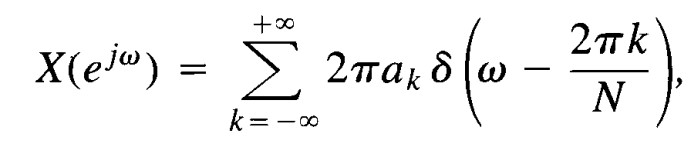

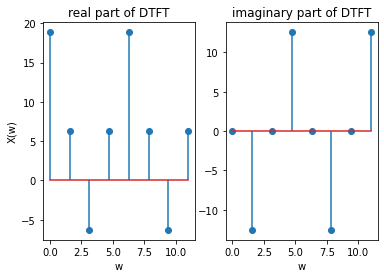

In [72]:
import math
import numpy as np
import collections
import matplotlib.pyplot as plt

x=np.arange(0,8)

def delta(x):
    if x.is_integer():
        return 1
    else:
        return 0
#3
y=[]
for n in x:
    y.append(4*delta(n/4)+8*delta((n-1)/4))

N=4#fundamental period

def FSCoeff(y,N):
    ak=[]#fourier series coefficient
    for k in x:
        s=0
        for n in range(0,N):
            s=s+(y[n]*np.exp(-1j*k*n*np.pi/2))
        ak.append(s/4)
    return ak
ak = FSCoeff(y,N)
w=[]
for k in x:
    w.append((2*np.pi*k)/N)

ft=[2*np.pi*ak[i] for i in x]
ftr=[]
ftimg=[]
for i in ft:
    ftr.append(i.real)
    ftimg.append(i.imag)

plt.subplot(1,2,1)
plt.stem(w,ftr)
plt.xlabel('w')
plt.ylabel('X(w)')
plt.title('real part of DTFT')
plt.subplot(1,2,2)
plt.stem(w,ftimg)
plt.xlabel('w')
plt.title('imaginary part of DTFT')
plt.show()





<h3> Properties of DTFS </h3>
<p> We shall now verify the following properties of DTFT for the given signal in the way similar to the one in previous case.
    <br>
Our strategy remains the same and is to verify it is to get the coefficients of the DTFS in 2 ways -
    <ul><li> By doing an operation on the signal in the time domain - Case 1</li> <li> By doing the corresponding operation on the coefficients - Case 2</li></p>
<h5> Time shifting property </h5>    

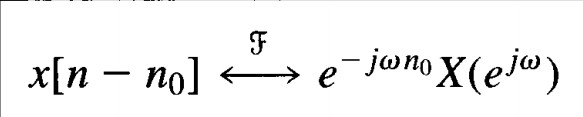

Real parts


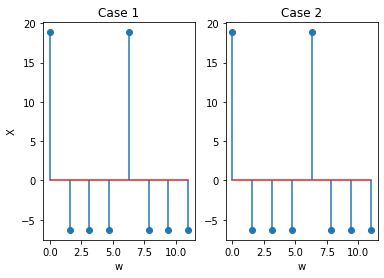

Imaginary parts


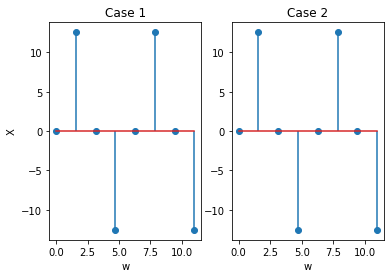

In [74]:

#properties of DTFT
#time shifting
no=2
yn=[]
for n in x:
    yn.append(4*delta((n-no)/4)+8*delta((n-no-1)/4))
    
akn = FSCoeff(yn,N)    
ftn=[2*np.pi*akn[i] for i in x]
temp=[]
for i in range(len(x)):
    temp.append(ft[x[i]]*np.exp(-1j*w[i]*no))

def nullChecker(n):
    if n < 1/math.pow(10,10) and n > -1/math.pow(10,10) and n!=0:
        return 0
    return n
    
def plotter(temp,ftn,w,label):
    tempR = []
    tempI = []
    ftnR = []
    ftnI = []
    for i in range(len(temp)):
        tempR.append(temp[i].real)
        tempI.append(nullChecker(temp[i].imag))
        ftnR.append(ftn[i].real)
        ftnI.append(nullChecker(ftn[i].imag))
    print("Real parts")
    plt.subplot(1,2,1)
    plt.stem(w,ftnR)
    plt.title("Case 1")
    plt.xlabel('w')
    plt.ylabel('X')
    plt.subplot(1,2,2)
    plt.stem(w,tempR)
    plt.title("Case 2")
    plt.xlabel('w')
#     plt.title(label)
    plt.show()
    print("Imaginary parts")
    plt.subplot(1,2,1)
    plt.stem(w,ftnI)
    plt.title("Case 1")
    plt.xlabel('w')
    plt.ylabel('X')
    plt.subplot(1,2,2)
    plt.stem(w,tempI)
    plt.title("Case 2")
    plt.xlabel('w')
#     plt.title(label)
    plt.show()
plotter(temp,ftn,w,"time shift")

<p> As it is visible, the plots in the two cases are evidently the same. Hence, the property is verified </p>
<h5>Linearity</h5>
<p> To demonstrate linearity, we shall take $yl[n] = y[n] + yn[n]$ and use the strategy discussed already </p>

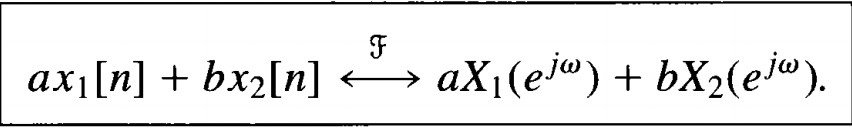

Real parts


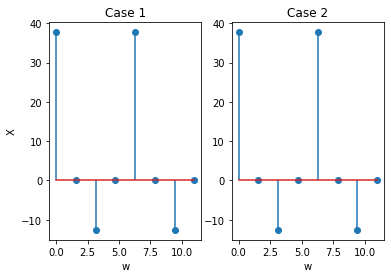

Imaginary parts


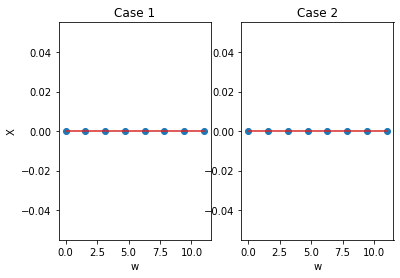

In [75]:
yl = []
for i in range(len(yn)):
    yl.append(yn[i]+y[i])
akl = FSCoeff(yl,N)    
ftl=[2*np.pi*akl[i] for i in x]
temp = []
for i in range(len(x)):
    temp.append(ftn[i]+ft[i])
plotter(temp,ftl,w,"linearity")    


<p> As it is visible, the plots in the two cases are evidently the same. Hence, the property is verified </p>
<h5>Frequency Shifting</h5>

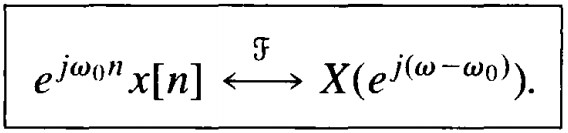

Real parts


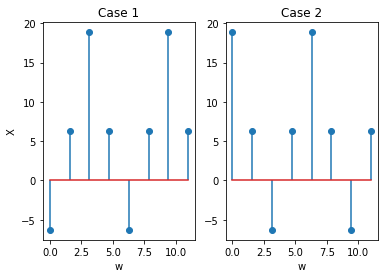

Imaginary parts


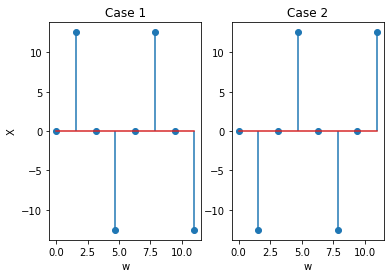

In [76]:
w0 = np.pi
yw0 = []
for n in x:
    yw0.append((4*delta(n/4)+8*delta((n-1)/4))*np.exp(1j*w0*n))
akw0 = FSCoeff(yw0,N)
ftw0=[2*np.pi*akw0[i] for i in x]
plotter(ft,ftw0,w,"frequency shift")    

<p> As it is visible, the plots in the two cases are evidently the same. Hence, the property is verified </p>
<h5>Periodicity</h5>
<p> We basically perform a frequency shift of 2pi </p>

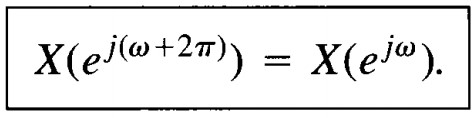

Real parts


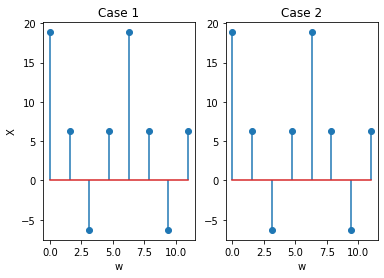

Imaginary parts


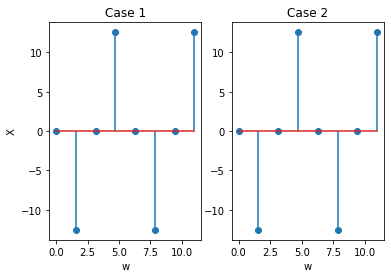

In [77]:
w0 = 2*np.pi
yw0 = []
for n in x:
    yw0.append((4*delta(n/4)+8*delta((n-1)/4))*np.exp(1j*w0*n))
akw0 = FSCoeff(yw0,N)
ftw0=[2*np.pi*akw0[i] for i in x]
plotter(ft,ftw0,w,"periodicity")    

<p> As it is visible, the plots in the two cases are evidently the same. Hence, the property is verified </p>
<h5>Difference Property</h5>

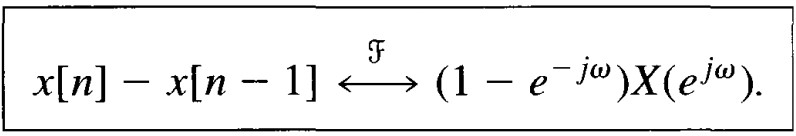

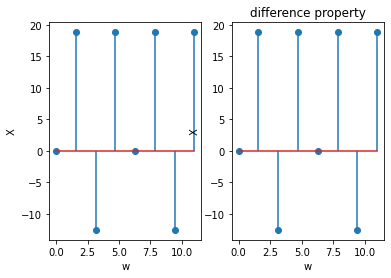

In [21]:
#difference property
no=1
yn=[]
for n in range(-1,11):
    yn.append(4*delta((n-no)/4)+8*delta((n-no-1)/4))
ydiff=[y[i]-y[i-1] for i in x]
bk=[]
for k in x:
    s=0
    for n in range(0,N):
        s=s+(ydiff[n]*np.exp(-1j*k*n*np.pi/2))
    bk.append(s/4)
fdiff=[2*np.pi*bk[i] for i in x]
temp=[]
for i in x:
    temp.append((1-np.exp(-1j*w[i]))*ft[i])

plt.subplot(1,2,1)
plt.stem(w,fdiff)
plt.xlabel('w')
plt.ylabel('X')
plt.subplot(1,2,2)
plt.stem(w,temp)
plt.xlabel('w')
plt.ylabel('X')
plt.title('difference property')
plt.show()


<p> As it is visible, the plots in the two cases are evidently the same. Hence, the property is verified </p>
<h5>Time Reversal</h5>

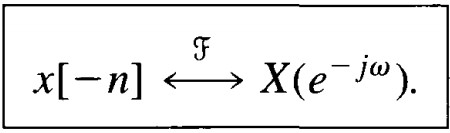

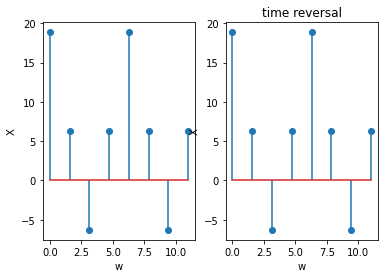

In [22]:
#time reversal
yrev=[]
for n in x:
    yrev.append(4*delta(-1*n/4)+8*delta((-1*n-1)/4))

bk=[]
for k in x:
    s=0
    for n in range(0,N):
        s=s+(yrev[n]*np.exp(-1j*k*n*np.pi/2))
    bk.append(s/4)

frev=[2*np.pi*bk[i] for i in x]
temp=ft.copy()

plt.subplot(1,2,1)
plt.stem(w,frev)
plt.xlabel('w')
plt.ylabel('X')
plt.subplot(1,2,2)
plt.stem(w,temp)
plt.xlabel('w')
plt.ylabel('X')
plt.title('time reversal')
plt.show()



<p> As it is visible, the plots in the two cases are evidently the same. Hence, the property is verified </p>
<h5>Symmetry property</h5>

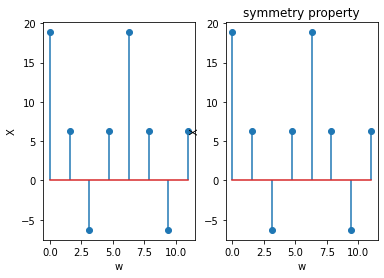

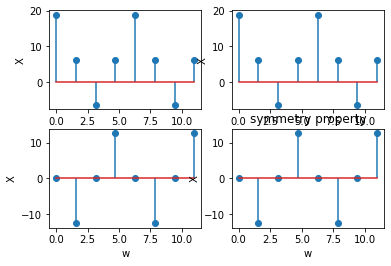

In [23]:

#symmetry property
#x[n] is real signal
fsym=[np.conj(i) for i in frev]
plt.subplot(1,2,1)
plt.stem(w,ft)
plt.xlabel('w')
plt.ylabel('X')
plt.subplot(1,2,2)
plt.stem(w,fsym)
plt.xlabel('w')
plt.ylabel('X')
plt.title('symmetry property')
plt.show()

frevr=[]
frevimg=[]
for i in frev:
    frevr.append(i.real)
    frevimg.append(i.imag)

for i in x:
    frevimg[i]=-1*frevimg[i]
plt.subplot(2,2,1)
plt.stem(w,ftr)
plt.xlabel('w')
plt.ylabel('X')
plt.subplot(2,2,2)
plt.stem(w,frevr)
plt.xlabel('w')
plt.ylabel('X')
plt.subplot(2,2,3)
plt.stem(w,ftimg)
plt.xlabel('w')
plt.ylabel('X')
plt.subplot(2,2,4)
plt.stem(w,frevimg)
plt.xlabel('w')
plt.ylabel('X')
plt.title('symmetry property')
plt.show()


<p> As it is visible, the plots in the two cases are evidently the same. Hence, the property is verified </p>
<h5>Multiplication Property</h5>

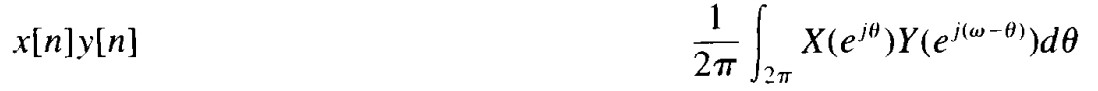

Real parts


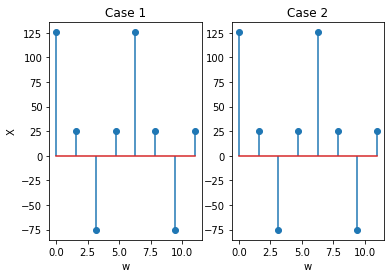

Imaginary parts


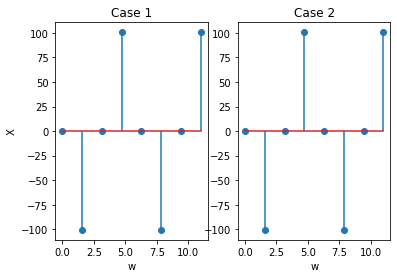

In [79]:
y_multiplication = []
for i in range(len(y)):
    y_multiplication.append(y[i]*yl[i])
ak_multiplication = FSCoeff(y_multiplication,N)
ft_multiplication=[2*np.pi*ak_multiplication[i] for i in x]
temp_multiplication = []
def dataFinder(w0,i):
    if i-w0 < 0:
        return ft[w0]*ftl[i-w0+4]
    else:
        return ft[w0]*ftl[i-w0]
for i in x:
    data = 0
    for w0 in range(0,4):   
         data += dataFinder(w0,i)
    temp_multiplication.append(data/(np.pi*2))
plotter(temp_multiplication,ft_multiplication,w,"multiplication property")        

<p> As it is visible, the plots in the two cases are evidently the same. Hence, the property is verified </p>
<h5>Convolution Property</h5>

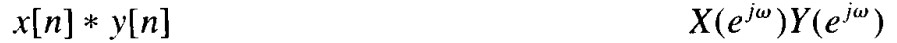

Real parts


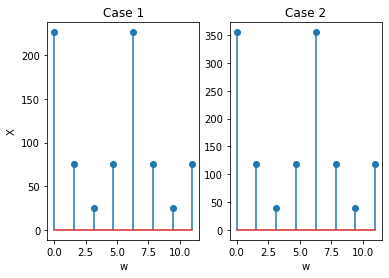

Imaginary parts


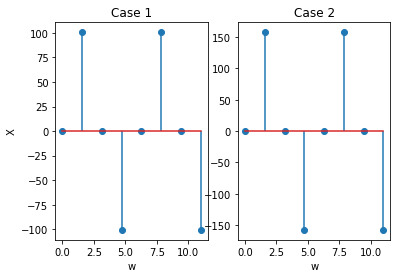

In [80]:
y_convolution = []
def dataFinderConvolution(k,n):
     if n-k < 0:
        return y[k]*yn[n-k+4]
     return y[k]*yn[n-k]

for n in x:
    data = 0
    for k in range(N):
        data+= dataFinderConvolution(k,n)
    y_convolution.append(data)

ak_convolution = FSCoeff(y_convolution,N)
ft_convolution=[2*np.pi*ak_convolution[i] for i in x]

temp_convolution = []
for i in x:
    temp_convolution.append(ft[i]*ftn[i])
plotter(temp_convolution,ft_convolution,w,"convolution property")            